In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!ls '/content/drive/MyDrive/bot/data'

test  train


In [5]:
#Give dataset path
train_path = '/content/drive/MyDrive/bot/data/train'
test_path = '/content/drive/MyDrive/bot/data/test'

Working with 1450 images
Image examples: 
1667.jpg


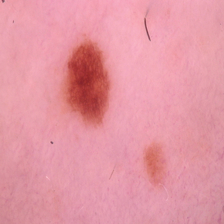

1679.jpg


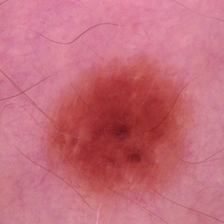

1451.jpg


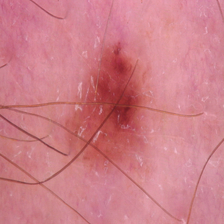

1671.jpg


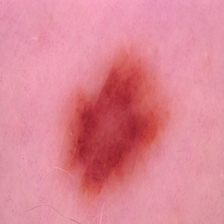

1450.jpg


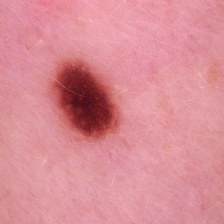

1554.jpg


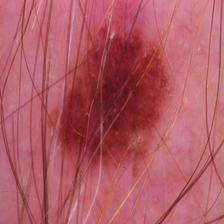

1518.jpg


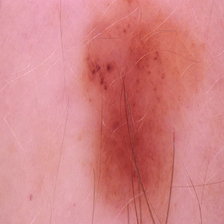

1606.jpg


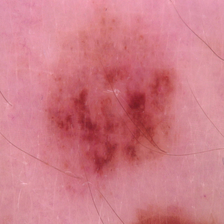

1680.jpg


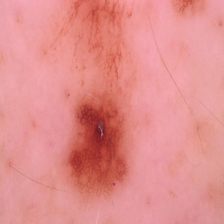

1570.jpg


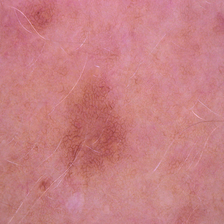

In [6]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/benign'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [7]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [8]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [9]:
for layer in vgg.layers:
  layer.trainable = False

In [10]:
folders = glob('/content/drive/MyDrive/bot/data/train/*')
print(len(folders))

2


In [11]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [13]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=100,
    width_shift_range=0.5,
    height_shift_range=0.5,
    shear_range=0.5,
    zoom_range=0.5,
    horizontal_flip=True,
    fill_mode='nearest')

In [14]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=100,
    width_shift_range=0.5,
    height_shift_range=0.5,
    shear_range=0.5,
    zoom_range=0.5,
    horizontal_flip=True,
    fill_mode='nearest')

In [15]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2647 images belonging to 2 classes.


In [16]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 660 images belonging to 2 classes.


In [17]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, monitor='val_accuracy', save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
5/5 - 75s - loss: 2.8294 - accuracy: 0.6125 - val_loss: 2.1569 - val_accuracy: 0.7152

Epoch 00001: val_accuracy improved from -inf to 0.71515, saving model to mymodel.h5
Epoch 2/10
5/5 - 38s - loss: 2.0789 - accuracy: 0.7563
Epoch 3/10
5/5 - 38s - loss: 1.4810 - accuracy: 0.8000
Epoch 4/10
5/5 - 31s - loss: 1.4980 - accuracy: 0.7937
Epoch 5/10
5/5 - 34s - loss: 1.9826 - accuracy: 0.7750
Epoch 6/10
5/5 - 26s - loss: 1.6075 - accuracy: 0.8375
Epoch 7/10
5/5 - 28s - loss: 1.3789 - accuracy: 0.8250
Epoch 8/10
5/5 - 22s - loss: 1.8856 - accuracy: 0.7688
Epoch 9/10
5/5 - 26s - loss: 1.3839 - accuracy: 0.7812
Epoch 10/10
5/5 - 21s - loss: 1.4487 - accuracy: 0.8250
Training completed in time:  0:07:02.618339


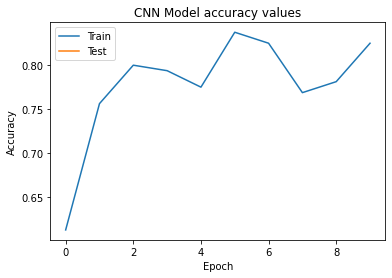

In [18]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()